# CS275P Final Project: Intrusion Detection System Analysis and Prediction

#### Connor McManigal, Aaron Mui, Rishabh Verma, and Peyton Politewicz

## Imports and Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [3]:
rt_iot2022 = fetch_ucirepo(id=942) 
x = rt_iot2022.data.features 
y = rt_iot2022.data.targets 

print("Data Shape with Aggregates\n")
print("Rows:", x.shape[0])
print("Features:", x.shape[1])

Data Shape with Aggregates

Rows: 123117
Features: 83


In [4]:
X = x.filter(regex='^((?!max|min|avg|std).)*$')

print("Data Shape without Aggregates\n")
print("Rows:", X.shape[0])
print("Features:", X.shape[1])
X.head()

Data Shape without Aggregates

Rows: 123117
Features: 47


,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.tot,idle.tot,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,0.0,0.0,0.0,0.0,2282414.913,29729182.96,64240,26847,502
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,0.0,0.0,0.0,0.0,2028306.961,29855277.06,64240,26847,502
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,0.0,0.0,0.0,0.0,2281903.982,29842149.02,64240,26847,502
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,0.0,0.0,0.0,0.0,2047288.179,29913774.97,64240,26847,502
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,0.0,0.0,0.0,0.0,2087656.975,29814704.90,64240,26847,502


## Exploratory Data Analysis

In [5]:
# get counts of targets
y.value_counts()

Attack_type               
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [6]:
# get counts of protocols
X['proto'].value_counts()

proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64

In [7]:
# get counts of network services
X['service'].value_counts()

service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

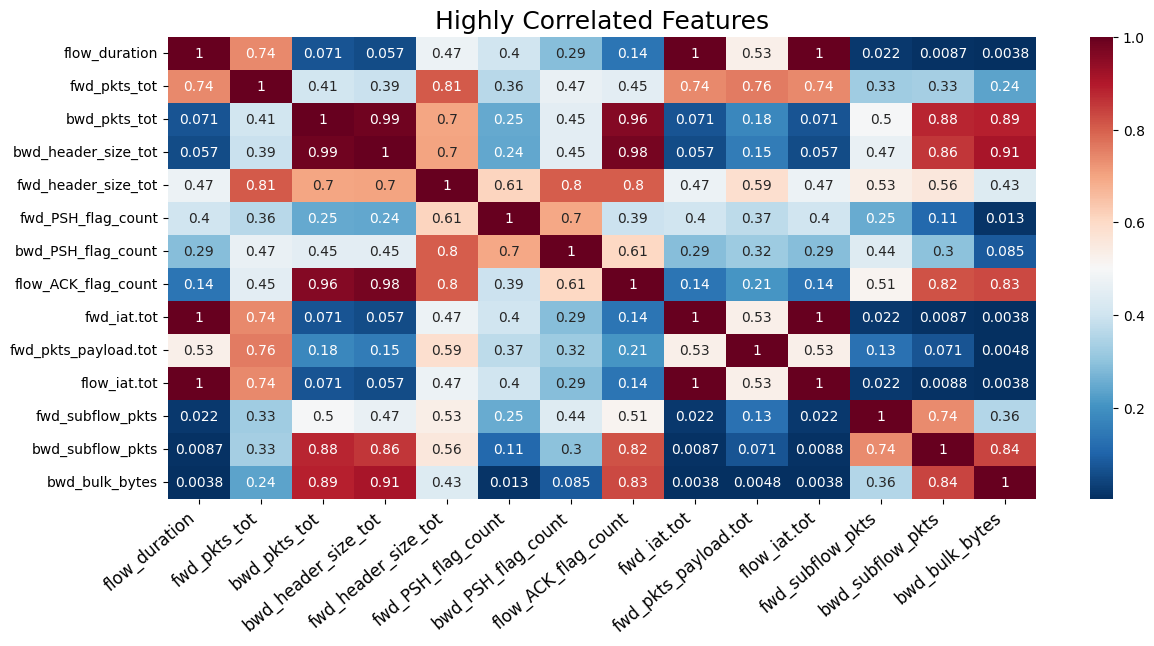

In [81]:
X_filter = X[['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'bwd_header_size_tot', 'fwd_header_size_tot', 'fwd_PSH_flag_count', 
                'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_iat.tot', 'fwd_pkts_payload.tot', 'flow_iat.tot', 'fwd_subflow_pkts', 
                'bwd_subflow_pkts', 'bwd_bulk_bytes']]
X_corr = X_filter.corr()

plt.figure(figsize=(14,6))
sns.heatmap(X_corr, annot = True, cmap = 'RdBu_r')
plt.title("Highly Correlated Features", fontsize = 18)
plt.xticks(rotation = 40, ha = 'right', fontsize = 12)
plt.show()

In [44]:
# ... boxplots

In [ ]:
# histograms ?

## VAE 